### 二倍体和四倍体在SYN区域保守的序列长度

> 从1个二倍体和1个四倍体，迭代到多个二倍体和多个四倍体

In [9]:
library(ggplot2)
library(dplyr)

In [10]:
plotData=data.frame()
for(sampleCount in seq(1,26,1)){
    randomData <- read.table(
        paste(
            "./A2_At_SYN_seqLength/A2_At_", sampleCount, "_samples.txt",
            sep = ""
        ),
        header = T, sep = "\t"
    )
    #* 随机状态下，二倍体和四倍体之间的保守序列长度
    coreSeqData=randomData %>% summarise( 
        meanSeqLen=mean(CoreSeq),maxSeqLen=max(CoreSeq),
        minSeqLen=min(CoreSeq),seqType="Core",
        sampleCount=sampleCount
        ) 
    VarSeqData=randomData %>% summarise(
        meanSeqLen=mean(VarSeq),maxSeqLen=max(VarSeq),
        minSeqLen=min(VarSeq),seqType="Var",
        sampleCount=sampleCount
        )
    plotData=rbind(
        plotData,coreSeqData
    )
    plotData=rbind(
        plotData,VarSeqData
    )
}

In [11]:
tail(plotData)

,meanSeqLen,maxSeqLen,minSeqLen,seqType,sampleCount
,<dbl>,<int>,<int>,<chr>,<dbl>
47,438820651,482780046,417561011,Core,24
48,1050789840,1110591365,925411022,Var,24
49,436286727,491683626,418343643,Core,25
50,1056555252,1109406157,923636509,Var,25
51,433735177,474133409,417257911,Core,26
52,1062589684,1112343797,942513460,Var,26


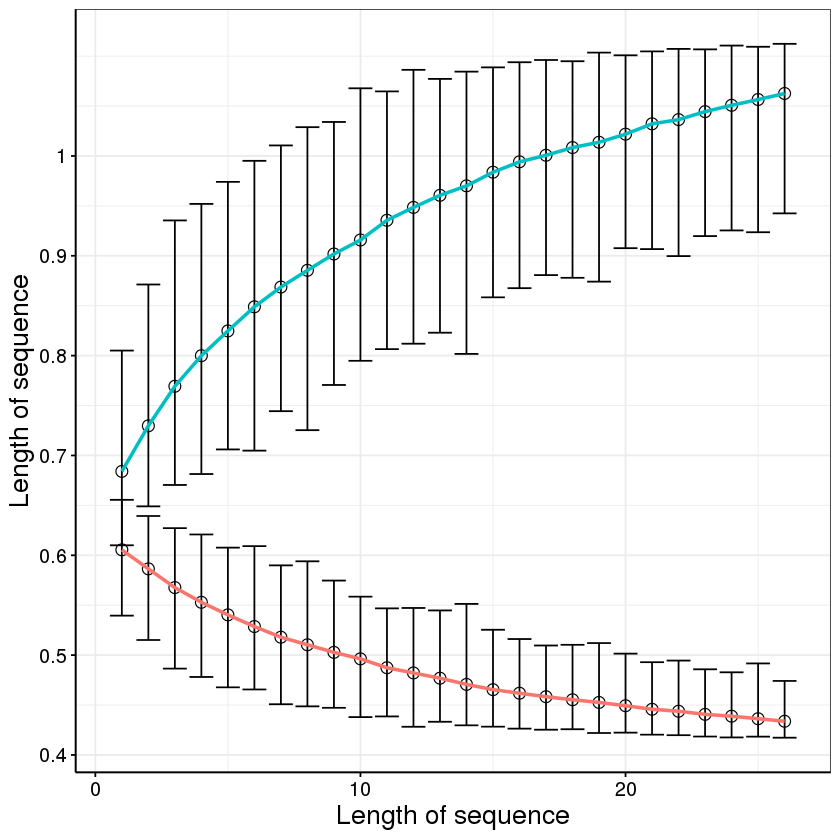

In [12]:
p=plotData %>% ggplot(
    aes(x = sampleCount, y = meanSeqLen, group = seqType)
) +
    geom_errorbar(
        aes(
            ymin = minSeqLen,
            ymax = maxSeqLen,
        )
    ) +
    geom_point(
        size = 3,
        shape = 1
    ) +
    geom_line(
        aes(y = meanSeqLen,color = seqType), size = 1
        ) +
    theme_bw() +
    xlab("Length of sequence") +
    ylab("Length of sequence") +
    scale_y_continuous(
        breaks = c(4e8,5e8, 6e8,7e8, 8e8,9e8, 1e9),
        labels = c(0.4,0.5,0.6,0.7,0.8,0.9,1)
    ) +
    base_theme+
    theme(
        axis.title = element_text(size = 16),
        axis.text = element_text(size = 12),
        legend.position = "none"
    )
p 
# pdf( 
#     "A2_At_SYN_seqLength/A2_At_seqConserved.pdf",
#     width = 4,height = 3
# )
# print(p)
# dev.off()